In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
#read csv
df = pd.read_csv("Iris.csv")

Y = np.array(df['Species'])
X = np.array(df.drop(['Id', 'Species'], axis = 1))

print Y[0:5]
print X[0:5]

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]


In [7]:
#split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, shuffle = True, stratify = Y)
print X_train[0:5]
print Y_train[0:5]

[[ 5.4  3.9  1.3  0.4]
 [ 5.   3.4  1.5  0.2]
 [ 6.4  3.2  4.5  1.5]
 [ 4.9  3.   1.4  0.2]
 [ 6.1  3.   4.6  1.4]]
['Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor']


In [8]:
model = LinearSVC()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print model.score(X_test, Y_test)

0.933333333333


In [9]:
model = SVC(C = 1.0, gamma = 0.5)
model.fit(X_train, Y_train)
print model.score(X_test, Y_test)

0.9


In [21]:
#linear svm
param_grid = {'C': [1e-10, 1.0, 2.0, 3.0]}
model = GridSearchCV(SVC(kernel = 'linear'), param_grid, cv = 5)
model.fit(X_train, Y_train)
print model.best_params_, 'train score = ', model.best_score_
print 'test score = ', model.best_estimator_.score(X_test, Y_test)

{'C': 1e-10} train score =  0.7225
test score =  0.72


In [11]:
#polynomial svm
param_grid = {'C': [1e-10, 1.0, 2.0, 3.0], 'gamma': [1e-3, 1e-2, 1e-1, 0.2, 0.3, 0.5, 1.0, 2.0, 3.0]}
model = GridSearchCV(SVC(kernel = 'poly'), param_grid, cv = 5)
model.fit(X_train, Y_train)
print model.best_params_, 'train score = ', model.best_score_
print 'test score = ', model.best_estimator_.score(X_test, Y_test)

{'C': 1.0, 'gamma': 0.1} train score =  0.975
test score =  0.933333333333


In [12]:
#gaussian svm
param_grid = {'C': [1e-10, 1e-1, 1.0, 1.5, 2.0, 3.0], 'gamma': [1e-3, 1e-2, 1e-1, 0.2, 0.3, 0.5, 1.0, 2.0, 3.0]}
model = GridSearchCV(SVC(kernel = 'rbf'), param_grid, cv = 5)
model.fit(X_train, Y_train)
print model.best_params_, 'train score = ', model.best_score_
print 'test score = ', model.best_estimator_.score(X_test, Y_test)

{'C': 2.0, 'gamma': 2.0} train score =  1.0
test score =  0.866666666667


Unit Test: you must display your model working on a trivial data set consisting of one or two input values and one output value (so that you can plot it in two or three dimensions). For this trivial data, you should calculate the performance measure and generate a plot to show the actual classification of new data. You are allowed to create your own data for this "unit test". Here, the dataset is manually created. The distribution of the dataset is a circle, y=(x1-5)^2+(x2-5)^2-3^2, if y >= 0, the data is colored for one type, if y < 0, the data is colored for another type 

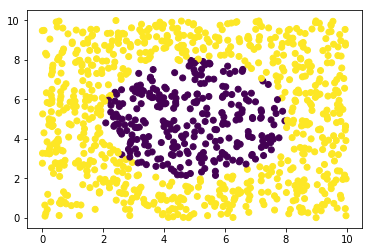

In [13]:
# Manually create dataset
numDot = 1000

x1 = 10.0 * np.random.rand(numDot)
x2 = 10.0 * np.random.rand(numDot)
y = (np.square(x1 - 5) + np.square(x2 - 5) - 9)
y[y >= 0] = 1
y[y < 0] = 0
plt.scatter(x1, x2, c= y)

In [14]:
X = np.concatenate((x1.reshape([numDot,1]), x2.reshape([numDot, 1])), axis = 1)
Y = y
print X[0:10]
print Y[0:10]

[[ 8.62995095  9.33117604]
 [ 6.78182103  0.90988754]
 [ 4.2504729   6.15078728]
 [ 1.89557534  1.97466301]
 [ 4.1388609   0.02173648]
 [ 2.53275377  5.63787638]
 [ 2.37823592  4.69207673]
 [ 6.77100763  4.1912082 ]
 [ 4.71045178  4.22625715]
 [ 0.4851868   3.61321951]]
[ 1.  1.  0.  1.  1.  0.  0.  0.  0.  1.]


In [15]:
#split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y)
print X[0:10]
print Y[0:10]

[[ 8.62995095  9.33117604]
 [ 6.78182103  0.90988754]
 [ 4.2504729   6.15078728]
 [ 1.89557534  1.97466301]
 [ 4.1388609   0.02173648]
 [ 2.53275377  5.63787638]
 [ 2.37823592  4.69207673]
 [ 6.77100763  4.1912082 ]
 [ 4.71045178  4.22625715]
 [ 0.4851868   3.61321951]]
[ 1.  1.  0.  1.  1.  0.  0.  0.  0.  1.]


In [16]:
#grid search
param_grid = {'C': [1.0, 10.0, 100.0], 'gamma': [1.0]}
model = GridSearchCV(SVC(kernel = 'rbf'), param_grid, cv = 5)
model.fit(X_train, Y_train)
print model.best_params_, 'train score = ', model.best_score_
print 'test score = ', model.best_estimator_.score(X_test, Y_test)

{'C': 100.0, 'gamma': 1.0} train score =  0.9825
test score =  0.995


Text(0.5,1,u'Predicted Data Distribution')

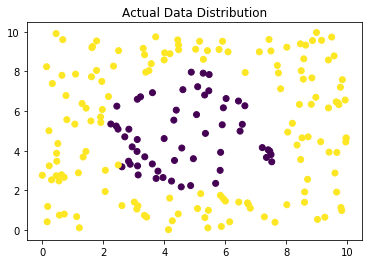

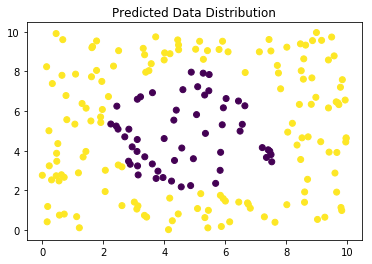

In [17]:
#plot actual data distribution and predict data distribution
Y_pred = model.best_estimator_.predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c = Y_test)
plt.title('Actual Data Distribution')
plt.figure()
plt.scatter(X_test[:, 0], X_test[:, 1], c = Y_pred)
plt.title('Predicted Data Distribution')